In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
group1 = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
group2 = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]
group3 = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]

In [4]:
from scipy.stats import f_oneway

In [5]:
f_stat,p_value=f_oneway(group1,group2,group3)

In [6]:
p_value

0.11384795345837218

In [7]:
if p_value<0.05:
  print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

Accept null hypothesis


In [8]:
df=pd.read_csv('Anova.csv')

In [9]:
df

,Class A,Class B,Class C
0,7,4,6
1,9,3,1
2,5,6,3
3,8,2,5
4,6,7,3
5,8,5,4
6,6,5,6
7,10,4,5
8,7,1,7
9,4,3,3


In [10]:
df.columns

Index(['Class A', 'Class B', 'Class C'], dtype='object')

In [11]:
f_stat1,p_value1=f_oneway(df['Class A'],df['Class B'],df['Class C'])

In [12]:
p_value1

0.0016690121879002645

In [13]:
if p_value1<0.05:
  print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

Reject null hypothesis


In [15]:
df1=pd.read_csv('PlantGrowth.csv')

In [16]:
df1

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
model=ols('weight~group',data=df1).fit()

In [19]:
aov_table=sm.stats.anova_lm(model,typ=1)

In [20]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
group,2.0,3.76634,1.883170,4.846088,0.01591
Residual,27.0,10.49209,0.388596,NaN,NaN


<Axes: title={'center': 'weight'}, xlabel='group'>

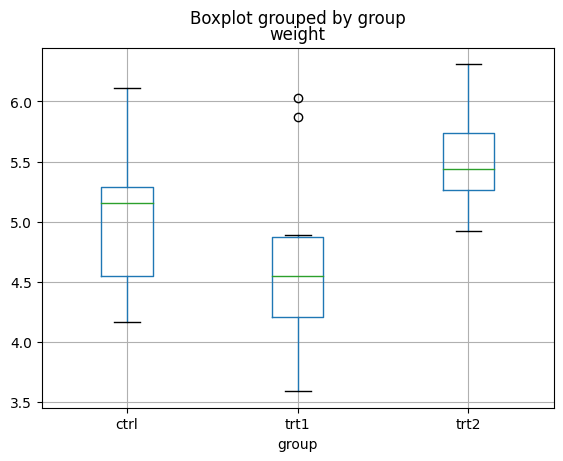

In [21]:
df1.boxplot('weight', by='group')

In [22]:
df2=pd.read_csv('Anova2.csv')

In [23]:
df2

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95
5,B,4.02,7.20,8.94
6,C,3.99,6.09,10.02
7,C,3.30,5.88,9.63
8,C,4.41,6.51,10.38
9,D,3.75,5.19,11.40


In [24]:
df_melt=pd.melt(df2, id_vars=['Genotype'],value_vars=['1_year','2_year','3_year'])

In [25]:
df_melt

,Genotype,variable,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94
5,B,1_year,4.02
6,C,1_year,3.99
7,C,1_year,3.30
8,C,1_year,4.41
9,D,1_year,3.75


In [26]:
df_melt.columns=['Genotype','Years','Value']

In [27]:
df_melt.head()

,Genotype,Years,Value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94
